# TLC Trip Record Data Analysis

In [1]:
import pandas as pd

Loading `yellow_tripdata_2019-01.parquet` from `data` folder

In [2]:
taxi_data = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [4]:
taxi_data.shape

(7696617, 19)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
            'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
            'DOLocationID', 'payment_type', 'total_amount']]

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

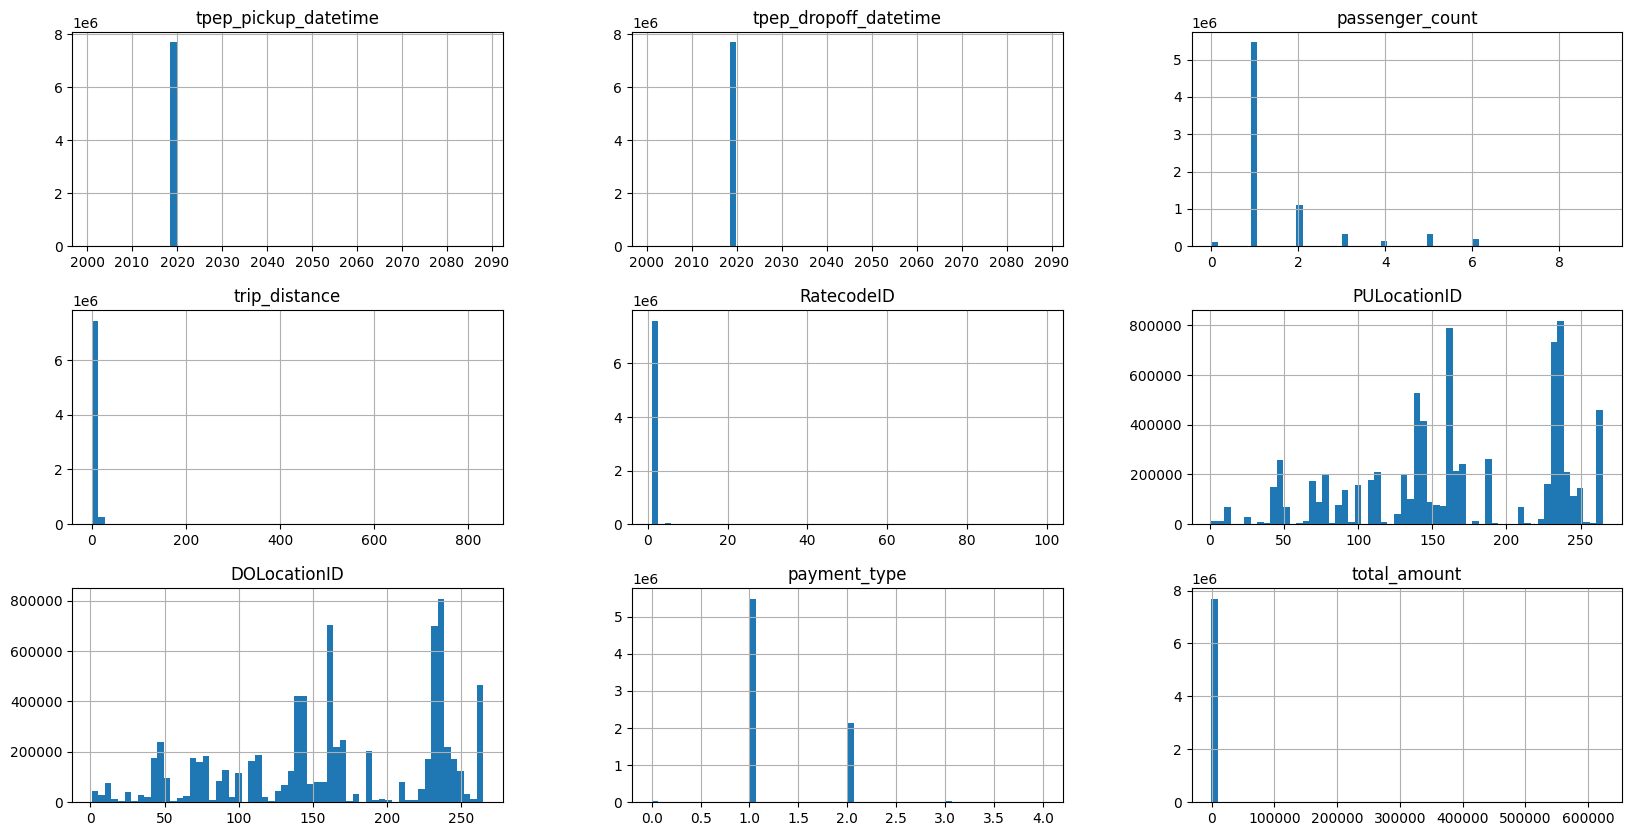

In [8]:
taxi_data.hist(figsize=(20, 10), bins=60)

In [9]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

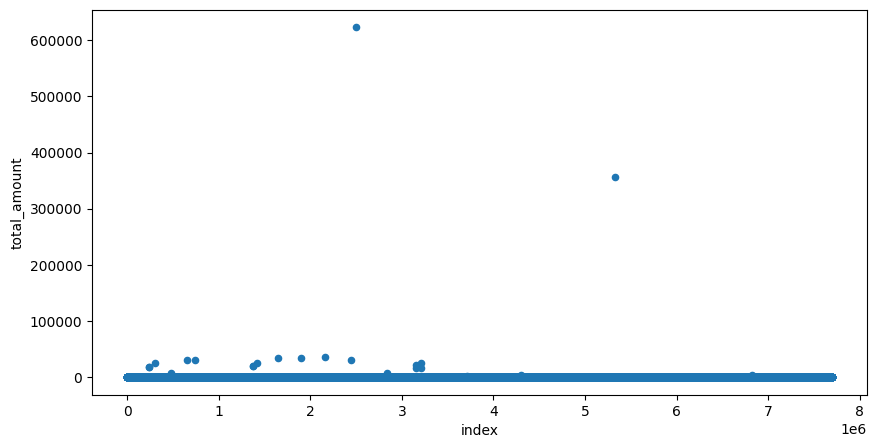

In [10]:
taxi_data.reset_index().plot(kind='scatter',y='total_amount', x='index', figsize=(10, 5))

<Axes: xlabel='index', ylabel='total_amount'>

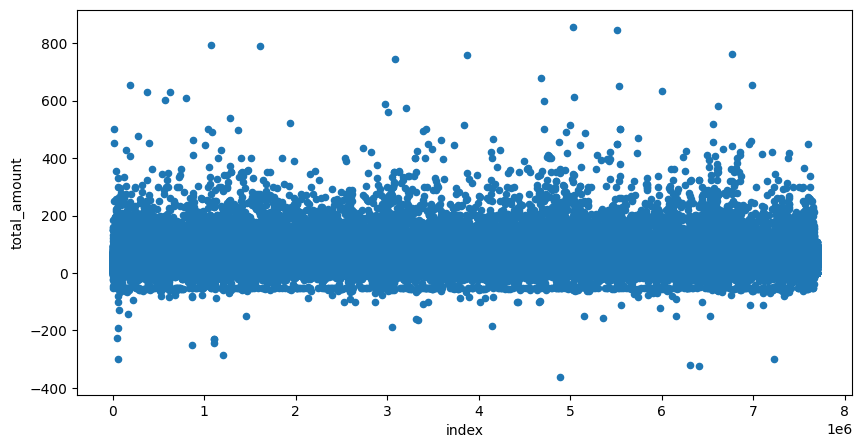

In [11]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter',y='total_amount', x='index', figsize=(10, 5))

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

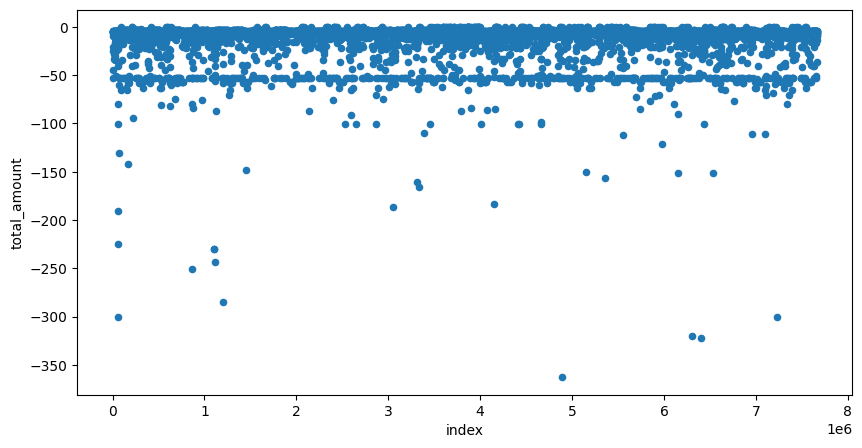

In [12]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [13]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [14]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

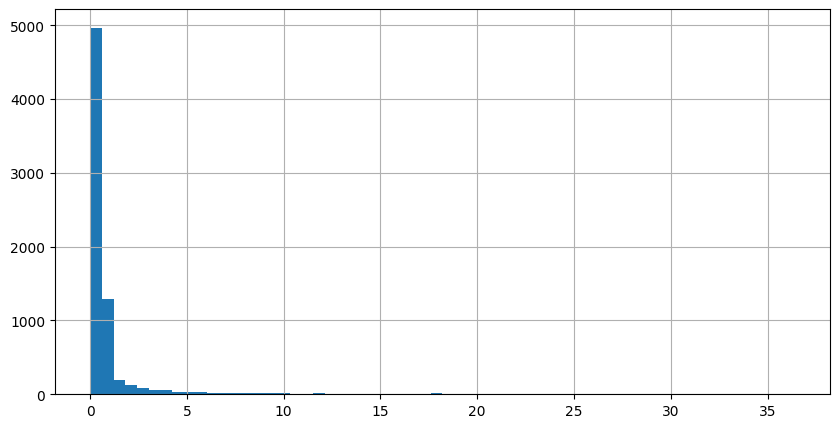

In [15]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [17]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

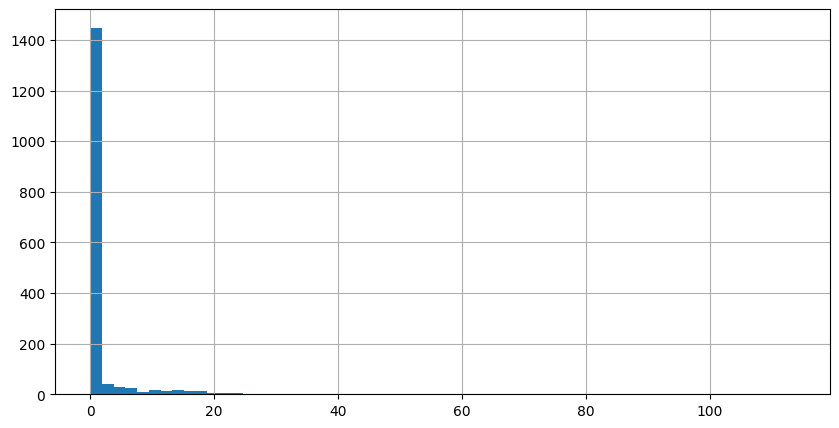

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [19]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [20]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [21]:
taxi_data['total_amount'].mean()

15.810651344610214

## Filtering Data
Droping of negative values of `total_amount` from the `taxi_data`
and also droping very higher tha `200$` values

In [22]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [23]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [24]:
taxi_data_filtered = taxi_data_filtered.dropna()

In [25]:
print(taxi_data.shape,taxi_data_filtered.shape)
print("Data droped: ",taxi_data.shape[0]-taxi_data_filtered.shape[0])

(7696617, 9) (7659647, 9)
Data droped:  36970


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

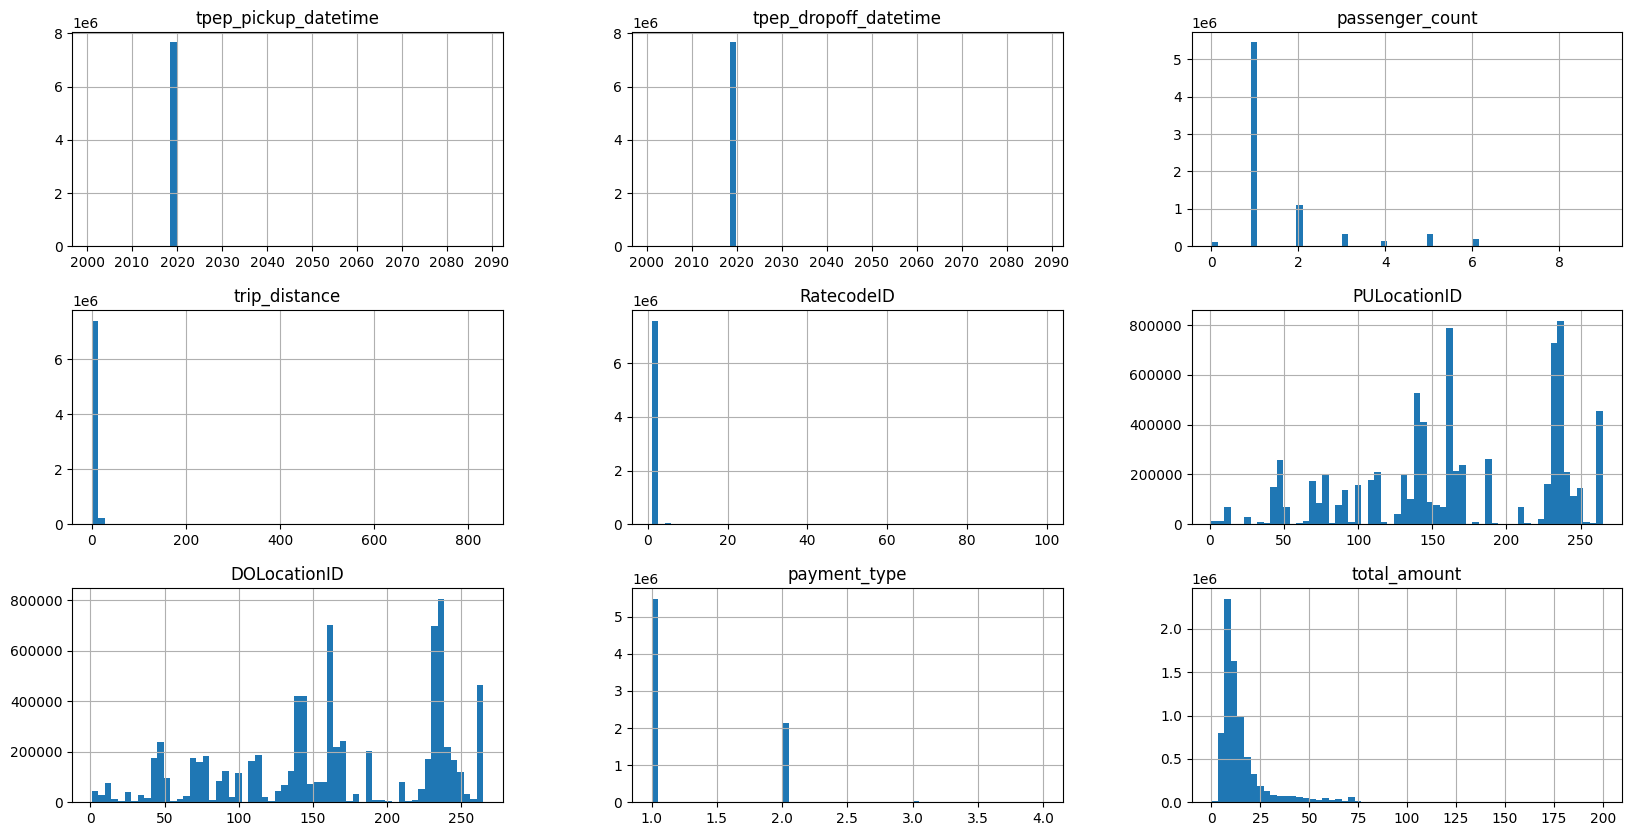

In [26]:
taxi_data_filtered.hist(figsize=(20, 10), bins=60)

## Data Preparation

In [27]:
taxi_data_prepared = taxi_data_filtered.copy()

In [28]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [29]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [30]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

C:\Users\Laptech\AppData\Local\Temp\ipykernel_17944\2820828323.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
C:\Users\Laptech\AppData\Local\Temp\ipykernel_17944\2820828323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['151' '239' '236' ... '264' '264' '193']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
C:\Users\Laptech\AppData\Local\Temp\ipykernel_17944\2820828323.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Va

In [31]:
taxi_data_prepared['transection_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)

In [32]:
taxi_data_prepared['transection_Year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transection_Month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transection_Day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transection_Hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [33]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transection_date,transection_Year,transection_Month,transection_Day,transection_Hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transection_date'}>],
       [<Axes: title={'center': 'transection_Year'}>,
        <Axes: title={'center': 'transection_Month'}>,
        <Axes: title={'center': 'transection_Day'}>],
       [<Axes: title={'center': 'transection_Hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

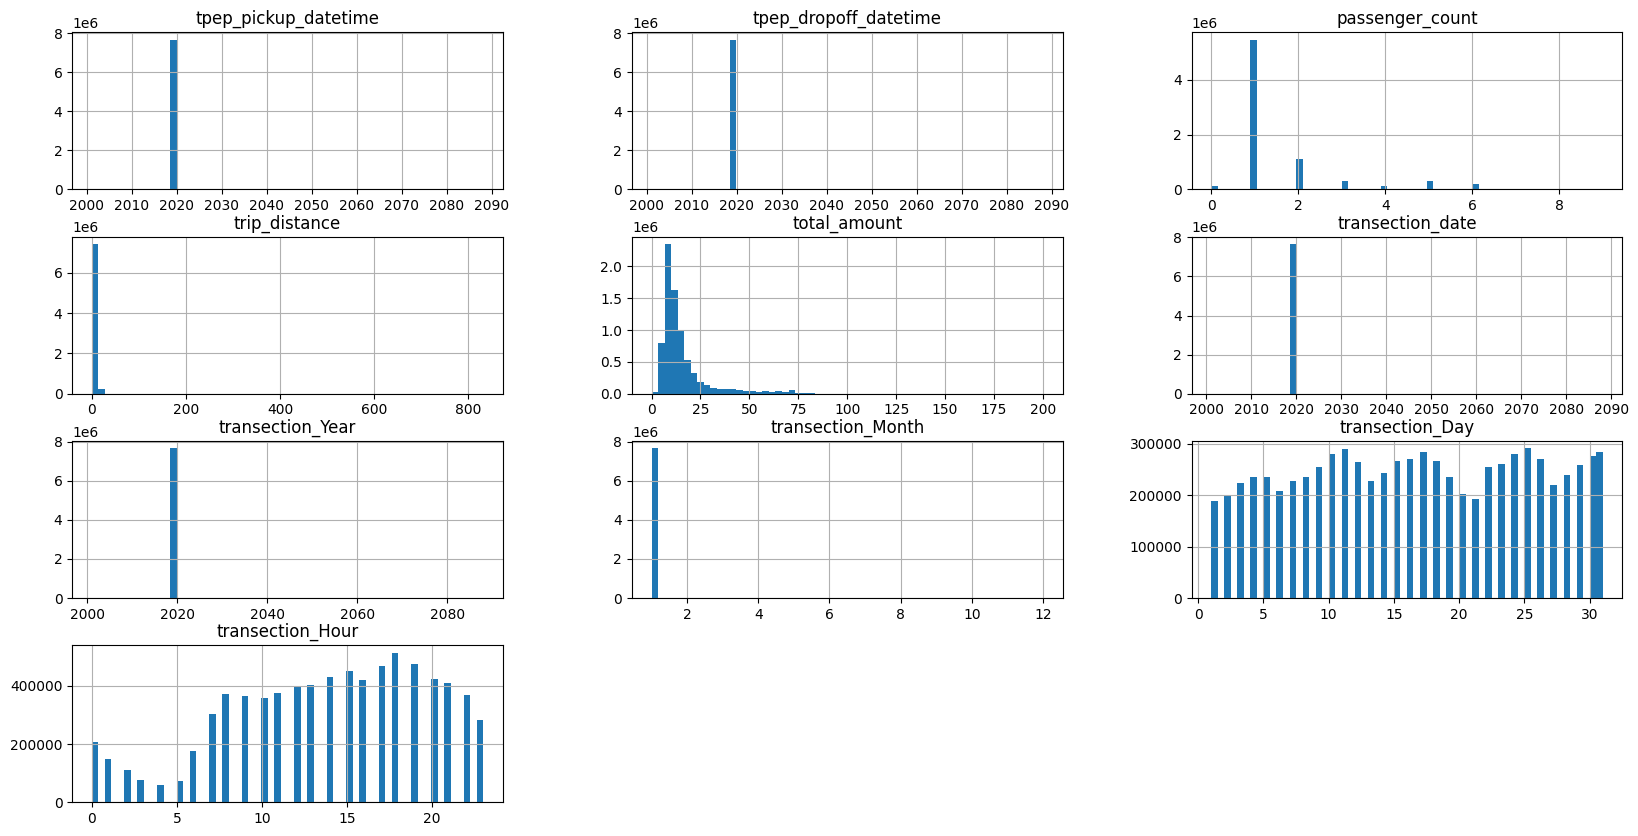

In [34]:
taxi_data_prepared.hist(figsize=(20, 10), bins=60)

#### Further Data Cleanig
selecting data for year = `2019` only
and month = `1` only


In [35]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transection_Year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transection_Month']==1]

In [36]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transection_date,transection_Year,transection_Month,transection_Day,transection_Hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


In [37]:
categorical_columns = ['PULocationID','transection_date','transection_Month','transection_Day','transection_Hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7659111, 7)


,PULocationID,transection_date,transection_Month,transection_Day,transection_Hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [38]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102496, 8)


,PULocationID,transection_date,transection_Month,transection_Day,transection_Hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

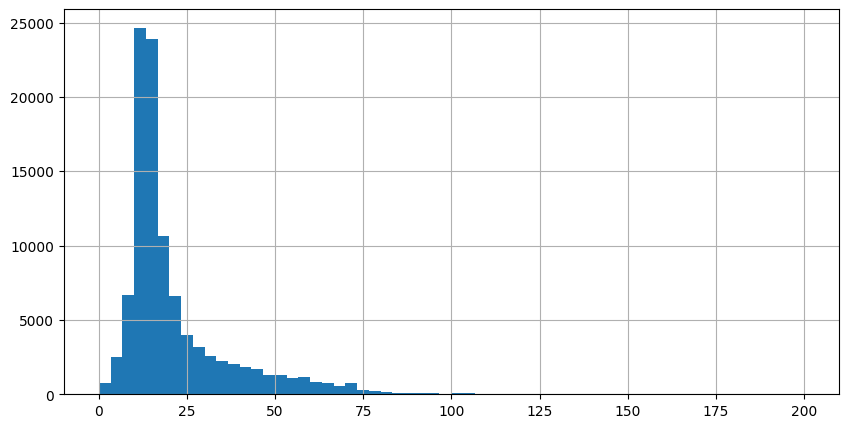

In [39]:
taxi_grouped_by_region['total_amount'].hist(bins=60, figsize=(10,5))

<Axes: >

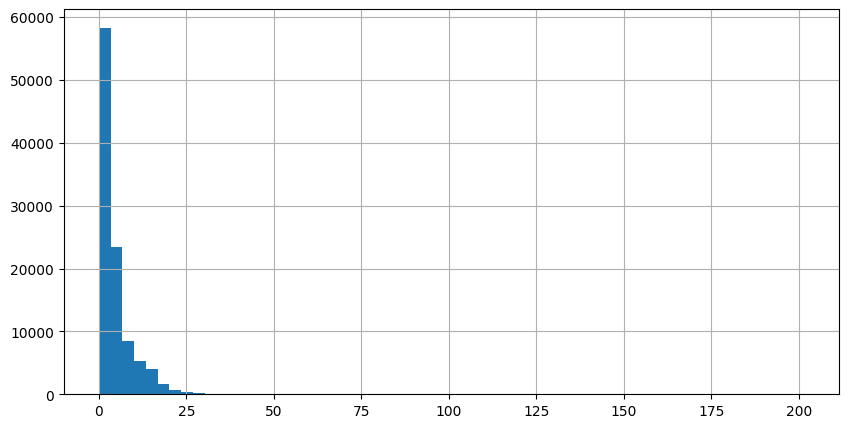

In [40]:
taxi_grouped_by_region['trip_distance'].hist(bins=60, figsize=(10,5))

## 5. Benchmark Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [55]:
data_for_benchmark = taxi_grouped_by_region.copy()

In [42]:
catagorical_features_for_benchmark = ['PULocationID','transection_Month','transection_Day','transection_Hour']
numerical_features_for_benchmark = ['trip_distance']
input_features_for_benchmark = catagorical_features_for_benchmark + numerical_features_for_benchmark
output_features_for_benchmark = ['total_amount']

Spliting Training and test data

In [47]:
x_bench = data_for_benchmark[input_features_for_benchmark]
y_bench = data_for_benchmark[output_features_for_benchmark]

x_bench = pd.get_dummies(x_bench)

x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(x_bench, y_bench, test_size=0.3, random_state=42)

Fiting Data to Model

In [48]:


tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_bench, y_train_bench)

DecisionTreeRegressor(max_depth=10)

Evaluating the Model

In [49]:
model_at_hand = tree

y_pred_bench = model_at_hand.predict(x_test_bench)



print("Mean Absolute Error: ", mean_absolute_error(y_test_bench, y_pred_bench))
print("Mean Squared Error: ", mean_squared_error(y_test_bench, y_pred_bench))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test_bench, y_pred_bench)))
print("R2 Score: ", r2_score(y_test_bench, y_pred_bench))


Mean Absolute Error:  3.377321239445833
Mean Squared Error:  65.18680205054856
Root Mean Squared Error:  8.073834408169922
R2 Score:  0.7659234296100517


<Axes: xlabel='true', ylabel='pred'>

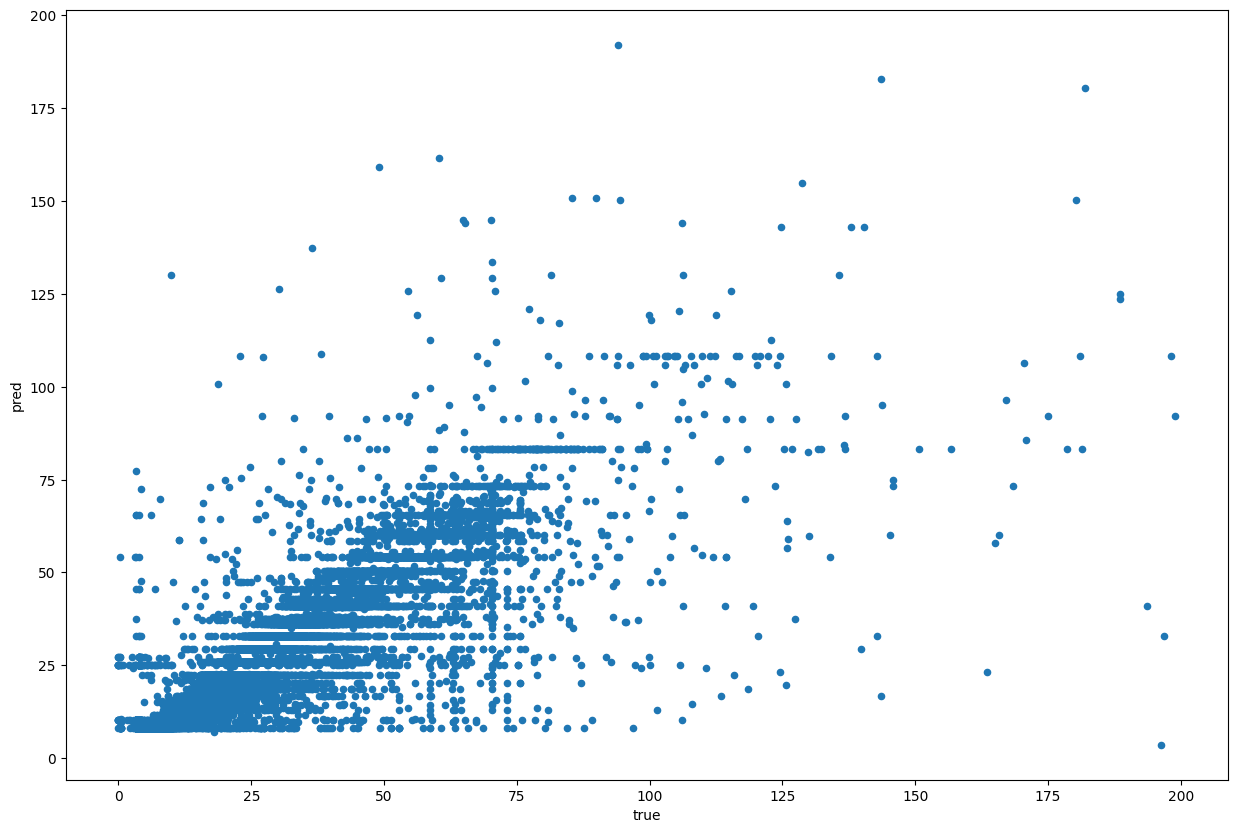

In [60]:
data = {'true' : y_test_bench['total_amount'], 'pred' : y_pred_bench}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))

### 5.1 Fixing Issue
`total_amout` is causing leakage in the model as it is directly related to the output feature `total_amount`


In [61]:

data_for_benchmark = taxi_grouped_by_region.copy()
input_features_for_benchmark = ['PULocationID','transection_Month','transection_Day','transection_Hour']
output_features_for_benchmark = ['total_amount']

# Slpiting the data into train and test
x_bench = data_for_benchmark[input_features_for_benchmark]
y_bench = data_for_benchmark[output_features_for_benchmark]

x_bench = pd.get_dummies(x_bench)

x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(x_bench, y_bench, test_size=0.3, random_state=42)

# Training the model
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_bench, y_train_bench)

model_at_hand = tree

# Predicting the output
y_pred_bench = model_at_hand.predict(x_test_bench)

# Evaluating the model
print("Mean Absolute Error: ", mean_absolute_error(y_test_bench, y_pred_bench))
print("Mean Squared Error: ", mean_squared_error(y_test_bench, y_pred_bench))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test_bench, y_pred_bench)))
print("R2 Score: ", r2_score(y_test_bench, y_pred_bench))



Mean Absolute Error:  9.805516995525528
Mean Squared Error:  220.53131139549276
Root Mean Squared Error:  14.850296677019378
R2 Score:  0.20810330601851856


<Axes: xlabel='true', ylabel='pred'>

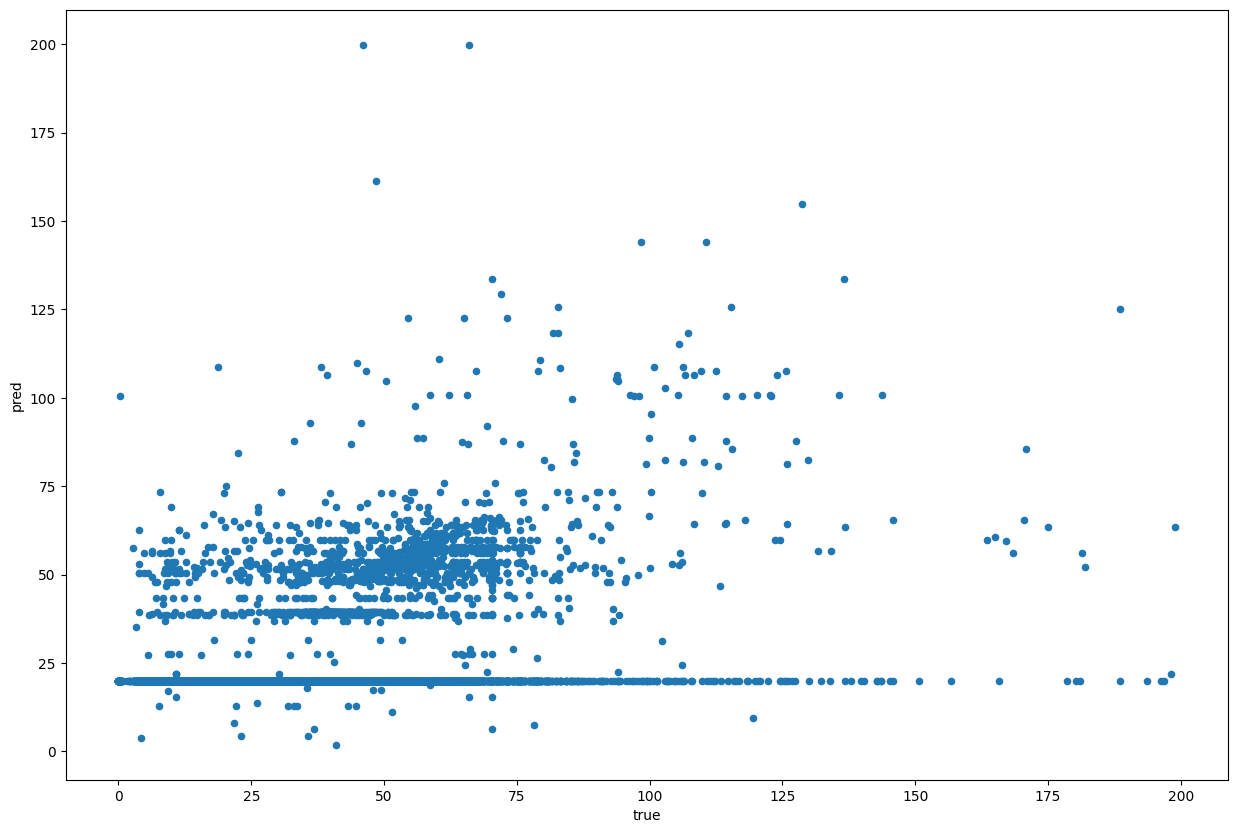

In [62]:
data = {'true' : y_test_bench['total_amount'], 'pred' : y_pred_bench}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))

## 6. Feature Engineering

In [114]:
taxi_grouped_by_region.head()

,PULocationID,transection_date,transection_Month,transection_Day,transection_Hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [115]:
taxi_data_new_feature = taxi_grouped_by_region.copy()

In [116]:
taxi_data_new_feature['transection_Day_of_Week'] = taxi_data_new_feature['transection_date'].dt.weekday
taxi_data_new_feature['week_end'] = taxi_data_new_feature['transection_Day_of_Week'].apply(lambda x: True if x>4 else False)
taxi_data_new_feature['week_end'].value_counts()

week_end
False    76781
True     25715
Name: count, dtype: int64

In [117]:
taxi_data_new_feature.head()

,PULocationID,transection_date,transection_Month,transection_Day,transection_Hour,trip_distance,total_amount,count_of_transactions,transection_Day_of_Week,week_end
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False


In [118]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2019-01-01', end='2019-01-31')
taxi_data_new_feature['is_holiday'] = taxi_data_new_feature['transection_date'].isin(holidays)

In [119]:
zone_lockup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lockup = zone_lockup[['LocationID','Borough']]
zone_lockup['LocationID'] = zone_lockup['LocationID'].astype(str)
zone_lockup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [120]:
taxi_data_new_feature = taxi_data_new_feature.merge(zone_lockup, left_on='PULocationID', right_on='LocationID', how='left')

In [121]:
taxi_data_new_feature['Borough'].value_counts()

Borough
Manhattan        45309
Brooklyn         23633
Queens           21942
Bronx             9586
Unknown            744
Staten Island      302
EWR                271
Name: count, dtype: int64

In [122]:
taxi_data_new_feature.head()

,PULocationID,transection_date,transection_Month,transection_Day,transection_Hour,trip_distance,total_amount,count_of_transactions,transection_Day_of_Week,week_end,is_holiday,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR


## 7. Trainoing data

In [123]:
data_for_model = taxi_data_new_feature.copy()

In [124]:
catagorical_features = ['PULocationID','transection_Month','transection_Day','transection_Hour','transection_Day_of_Week','week_end','is_holiday','Borough']
input_features = catagorical_features

output_features = ['total_amount']

Spliting data into train and test

In [126]:
X = data_for_model[input_features]
Y = data_for_model[output_features]

X = pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [127]:
decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=10)

In [128]:
model_at_hand = decision_tree

Y_pred = model_at_hand.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2_score(Y_test, Y_pred))

Mean Absolute Error:  8.467314215043213
Mean Squared Error:  192.6022127780078
Root Mean Squared Error:  13.878119929515229
R2 Score:  0.30839274211317524


<Axes: xlabel='true', ylabel='pred'>

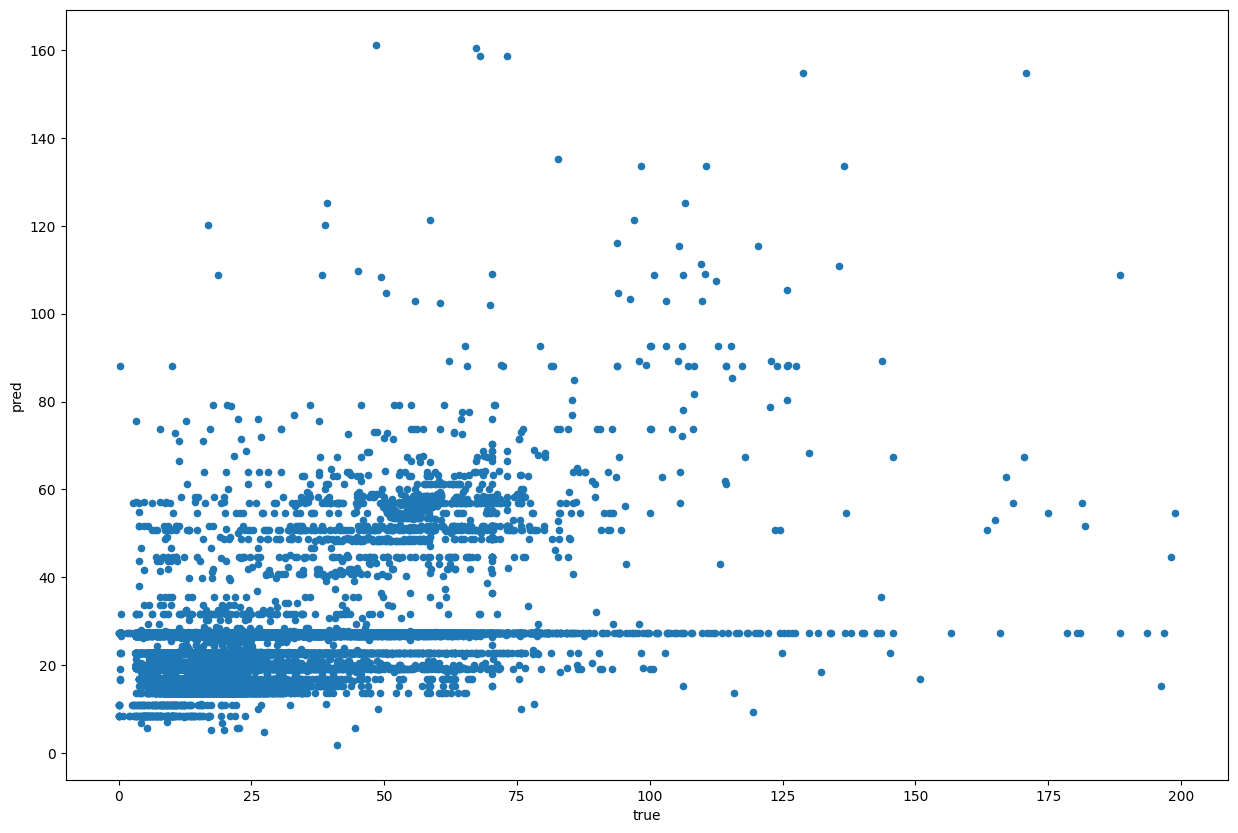

In [132]:
data = {'true' : Y_test['total_amount'], 'pred' : Y_pred}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))

Ramdom Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

d:\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [133]:
model_at_hand = random_forest

Y_pred = model_at_hand.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2_score(Y_test, Y_pred))

Mean Absolute Error:  7.460425945267733
Mean Squared Error:  178.68594499043215
Root Mean Squared Error:  13.367346220938252
R2 Score:  0.358364088058599


<Axes: xlabel='true', ylabel='pred'>

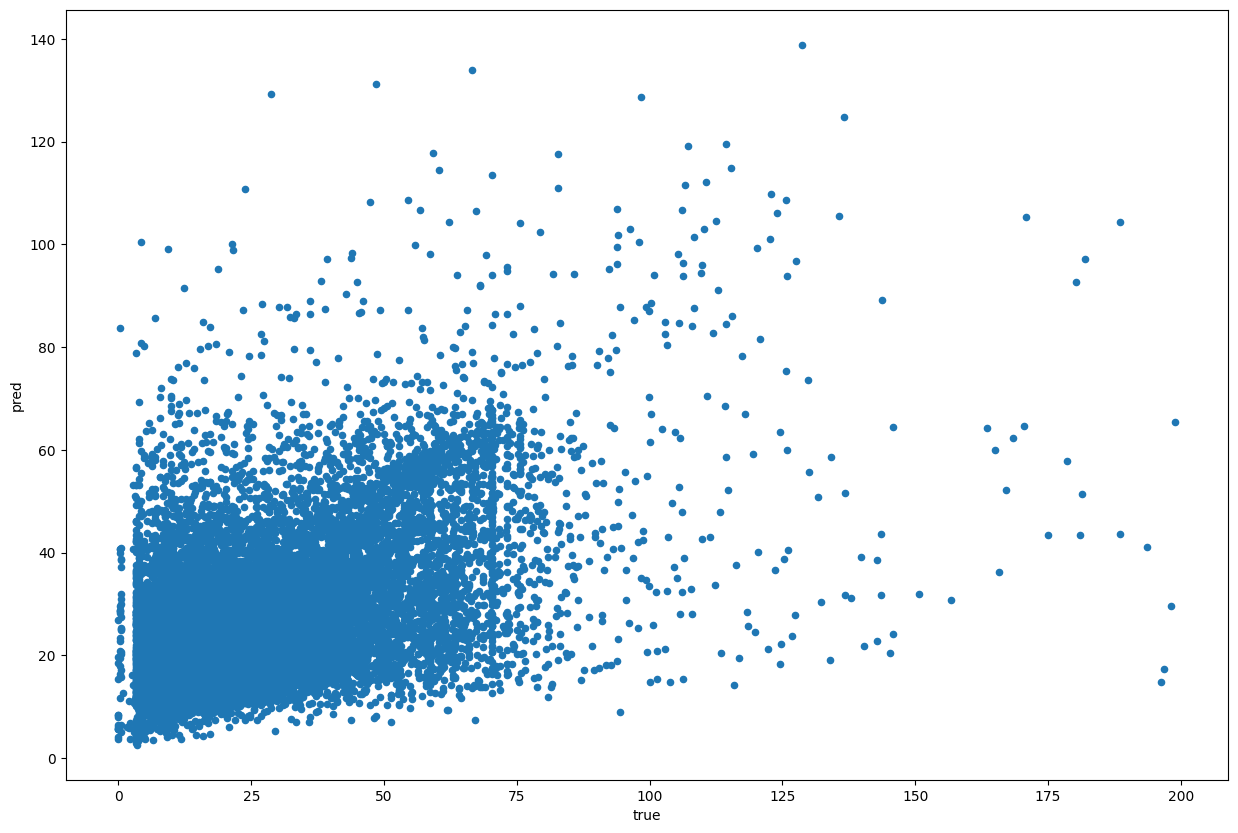

In [134]:
data = {'true' : Y_test['total_amount'], 'pred' : Y_pred}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))

Gradient Booting 

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, Y_train)

d:\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [136]:
model_at_hand = gradient_boosting

Y_pred = model_at_hand.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2_score(Y_test, Y_pred))

Mean Absolute Error:  8.290031348191599
Mean Squared Error:  175.50843690891043
Root Mean Squared Error:  13.247959726271453
R2 Score:  0.36977406938476054


<Axes: xlabel='true', ylabel='pred'>

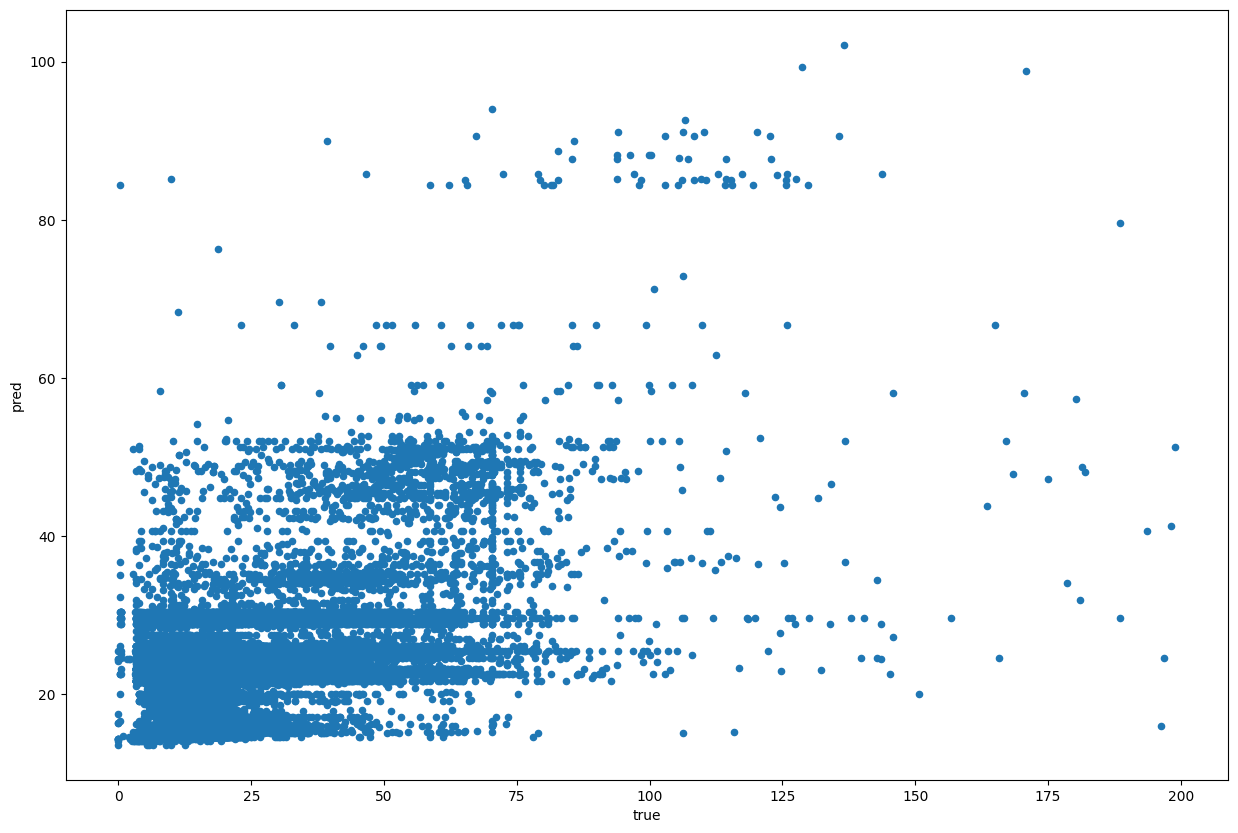

In [137]:
data = {'true' : Y_test['total_amount'], 'pred' : Y_pred}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))

## 8. Tuning

In [139]:
# Number of trees in random forest
import numpy as np


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [140]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [142]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, Y_train)  

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Python\Python312\Lib\site-packages\sklearn\utils\_param_valida

In [143]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,316.231495,14.066488,20.760609,6.223651,200,10,1,sqrt,200.0,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.424460,0.393851,0.406368,0.408226,0.012565,3
1,90.909923,9.973140,3.356209,0.612145,200,5,4,sqrt,20.0,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.370443,0.364122,0.372374,0.368980,0.003524,5
2,143.226730,17.463857,6.041321,1.997345,200,40,4,sqrt,20.0,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.370585,0.360609,0.372513,0.367902,0.005217,6
3,0.194654,0.017304,0.000000,0.000000,400,40,10,auto,20.0,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.278782,0.086720,0.000000,0.000000,1000,20,20,auto,50.0,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,1961.701618,13.883274,121.590599,2.545167,1200,5,1,sqrt,100.0,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.385487,0.354822,0.367733,0.369347,0.012571,4
6,373.531113,9.883763,14.039365,2.173094,1400,5,20,sqrt,10.0,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.276158,0.272689,0.278833,0.275893,0.002516,7
7,1176.209035,25.447949,47.411283,5.623609,1400,10,10,sqrt,NaN,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.427285,0.410988,0.420615,0.419630,0.006690,2
8,0.411195,0.048176,0.000000,0.000000,1800,10,2,auto,50.0,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,829.758361,232.474377,38.427081,3.879124,600,10,2,sqrt,500.0,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.436968,0.412555,0.425694,0.425073,0.009976,1


In [146]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 300,
bootstrap= False)
best.fit(X_train, Y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)


d:\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Time elapsed:  338.5300450325012  seconds


In [147]:
print('mean_absolute_error', mean_absolute_error(Y_test, y_pred))
print('mean_squared_error', mean_squared_error(Y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(Y_test, y_pred)))
print('r2', r2_score(Y_test, y_pred))

mean_absolute_error 7.1886179957902
mean_squared_error 159.33921600961557
root_mean_squared_error 12.622963836184256
r2 0.42783545075225726


<Axes: xlabel='true', ylabel='pred'>

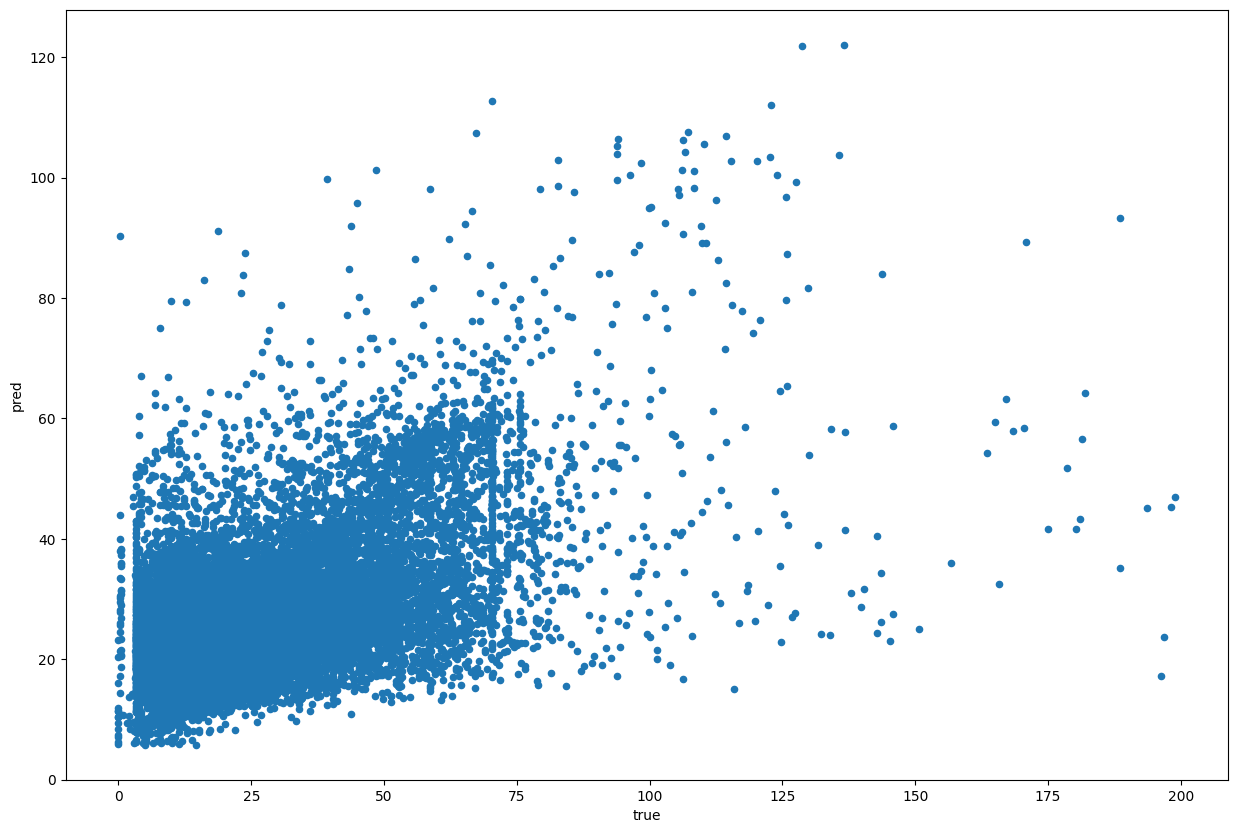

In [150]:
data = {'true' : Y_test['total_amount'], 'pred' : y_pred}
result = pd.DataFrame(data)

result.plot(kind='scatter', x='true', y='pred', figsize=(15,10))